In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
from sklearn.utils import resample
import streamlit as st
# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve
# Validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline, make_pipeline
# Feature Extraction
from sklearn.feature_selection import RFE
import keras 

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Ensembles
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {'axes.grid' : False})

In [3]:
def read_in_and_split_data(data, target):
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [4]:
def GetModel():
    Models = []
    Models.append(('LR'   , LogisticRegression()))
    Models.append(('NB'   , GaussianNB()))
    return Models

In [5]:
def NormalizedModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    return pipelines

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [7]:
def fit_model(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=num_folds, shuffle=True, random_state=0)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [8]:
# Performance Measure
def classification_metrics(model, conf_matrix):
    print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
    print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")
    fig,ax = plt.subplots(figsize=(8,6))
    sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title('Confusion Matrix', fontsize=20, y=1.1)
    plt.ylabel('Actual label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()
    print(classification_report(y_test, y_pred))
    classes = np.unique(y_test)

In [9]:
def roc_auc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure(figsize=(8,6))
    print(f"roc_auc score: {auc(fpr, tpr)*100:.1f}%")
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate',fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=20)
    plt.legend()
    plt.show()


In [10]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:

target ='label'
X_train, X_test, y_train, y_test = read_in_and_split_data(df, target)
models = GetModel()
names,results = fit_model(X_train, y_train,models)
ScaledModel = NormalizedModel('standard')
name,results = fit_model(X_train, y_train, ScaledModel)

LR: 0.954545 (0.016662)
NB: 0.993750 (0.004720)
standardLR: 0.969886 (0.014827)
standardNB: 0.993750 (0.004720)


Training Accuracy Score: 97.5%
Validation Accuracy Score: 96.4%


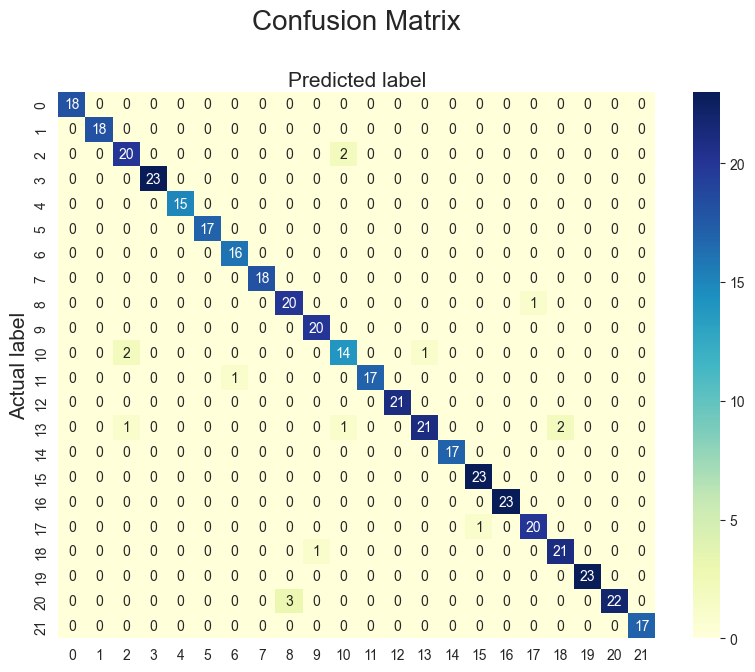

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.87      0.91      0.89        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        16
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.95      0.91        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.82      0.82      0.82        17
       maize       1.00      0.94      0.97        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.95      0.84      0.89        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       0.96      1.00      0.98        23
      orange       1.00      1.00      1.00        23
      papaya       0.95    

In [13]:
pipeline = make_pipeline(StandardScaler(),  LogisticRegression())
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
conf_matrix = confusion_matrix(y_test,y_pred)
classification_metrics(pipeline, conf_matrix)

In [14]:
N = float(input("enter Nitrogen value in %"))
P = float(input("enter Phrosphorus value in %"))
K = float(input("enter Potassium value in %"))
temperature = float(input("enter Temperature in deg.c"))
humidity = float(input("enter humidity value "))
ph = float(input("enter PH value (0-7)"))
rainfall = float(input("enter RainFall value in mm"))
sample = [N, P, K, temperature, humidity, ph, rainfall]
single_sample = np.array(sample).reshape(1,-1)
pred = model.predict(single_sample)
pred.item().title()
print("Recomended crop to grow is:",pred.item().title())

Recomended crop to grow is: Mango
